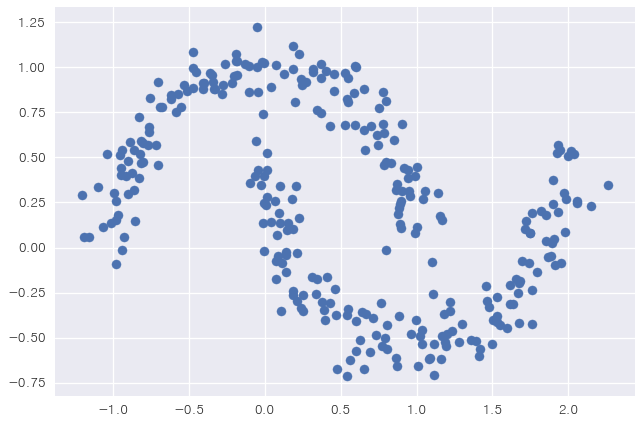

In [6]:
# 밀도기반 클러스터링 - DBSCAN(Density-based Spatial Clustering of Applications with Noise)

%matplotlib inline
#import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# 회귀 분석 - 선형 회귀
from sklearn.linear_model import LinearRegression

#회귀 분석 - 다항 회귀
from sklearn.preprocessing import PolynomialFeatures

# MSE : 평균제곱오차, 작을 수록 오차가 작다.
# R2 : 결정 계수, 1에 가까울 수록 적합도가 좋음 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 회귀 분석 - 의사결정트리/랜덤포레스트
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 교차 검증(Cross Vaildation)
#from sklearn.cross_validation import train_test_split

# k-means 클러스터링
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 계층적 클러스터링
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage # 응집형(Agglomerative)
from scipy.cluster.hierarchy import dendrogram # 응집형(Agglomerative) 
from sklearn.cluster import AgglomerativeClustering # 응집형(Agglomerative) 

# 밀도기반 클러스터링 - DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN


style.use('seaborn-talk')

krfont = {'family':'HYGothic-Medium', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

X, y = make_moons(n_samples=300, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# 반달 모양 샘플 데이터 생성

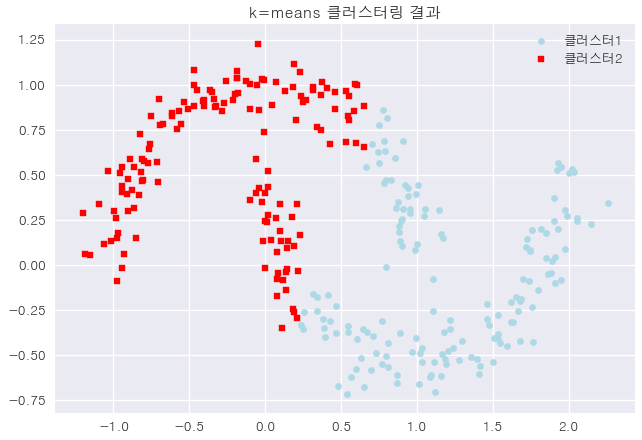

In [8]:
# plotResult() 함수 정의 및 k-means 클러스터링으로 샘플 데이터 분류

def plotResult(X, y, title='클러스터링 결과'):
    plt.scatter(X[y==0, 0], X[y==0, 1], c='lightblue', marker='o', s=40,
               label='클러스터1')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', marker='s', s=40,
               label='클러스터2')
    
    plt.title(title)
    plt.legend()
    plt.show()
    
# k-means 클러스터링으로 분류하기
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)

plotResult(X, y_km, title='k=means 클러스터링 결과')


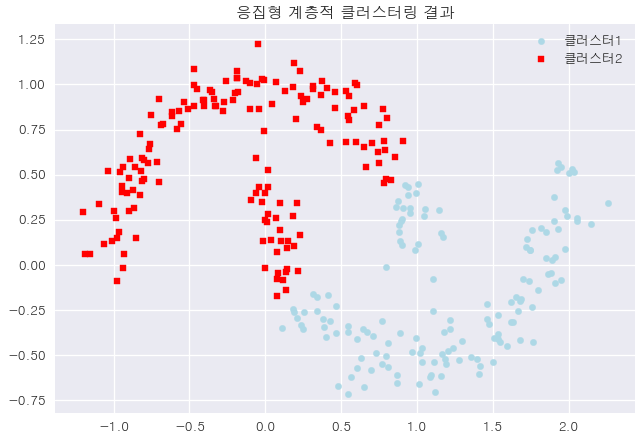

In [12]:
# k-means 클러스터링의 분류는 완벽하지 않아 보인다.
# 응집형 계층적 크러스터링으로 분류

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)

plotResult(X, labels, title='응집형 계층적 클러스터링 결과')


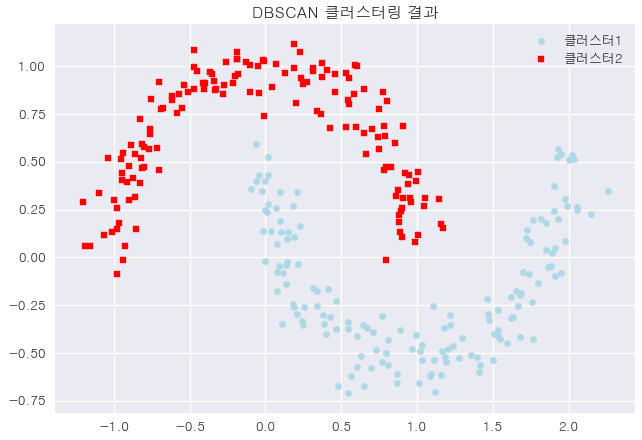

In [24]:
# 품질은 조금 좋아졌으나 아직 부족해 보인다.
# 밀도기반 클러스터링 - DBSCAN을 이용해 분류

db = DBSCAN(eps=0.175, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plotResult(X, y_db, title='DBSCAN 클러스터링 결과')

# eps 값을 최적으로 잡아주는 알고리즘이 추가로 필요할 듯 하다. [M26]